In [2]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.style import use
import numpy as np
import matplotlib as mpl
%matplotlib inline
use("ggplot")
PRSA = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv",
                  index_col=0)
bike_sharing = pd.read_csv("day.csv", index_col=0)

# 2. Density based plots with `matplotlib`

In this section, we will be looking at density based plots. Plots like these address a problem with big data: How does one visualise a plot with 10,000++ data points and avoid **overplotting**. 

In [3]:
PRSA.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


*Source* : https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

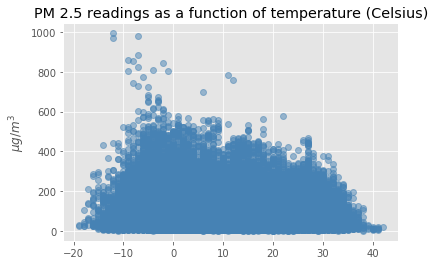

In [4]:
plt.plot( PRSA.TEMP, PRSA["pm2.5"], 'o', color="steelblue", alpha=0.5)
plt.ylabel("$\mu g/m^3$")
plt.title("PM 2.5 readings as a function of temperature (Celsius)")

As one can see, there's not much one can say about the structure of the data because every point below 400 $\mu g/m^3$ is totally filled up with blue color. 

It is here, that a density plot helps mitigate this problem. The central idea is that individual data points are not so important in as much as they contribute to revealing the underlying **distribution** of the data. In other words, for large amounts of data, we want to visualize the distribution instead of visualizing how individual datapoints are placed. 

For this lesson, we will look at this data set and others to investigate the use of other plotting functions in `matplotlib`. 

## 2.1 Learning objectives 

  * To use histograms to visualize distribution of univariate data. 
  * To  customize histograms. 
  * To use 2D histogram plots and hexbin plots to plot 2D distributions.  
  * To plot colorbars to annotate such plots
  * To use KDE plots to compare distributional information between data arrays. 

# 3. Histograms

Histograms are created using the `hist` command. We illustrate this using the PRSA data set. Let's say that we are interested in plotting the distribution of the variables `DEWP`, `TEMP` and `PRES`. 

(array([   20.,   275.,  3142.,  5542.,  5446.,  6412.,  5049.,  6162.,
         8685.,  3091.]),
 array([-40. , -33.2, -26.4, -19.6, -12.8,  -6. ,   0.8,   7.6,  14.4,
         21.2,  28. ]),
 <a list of 10 Patch objects>)

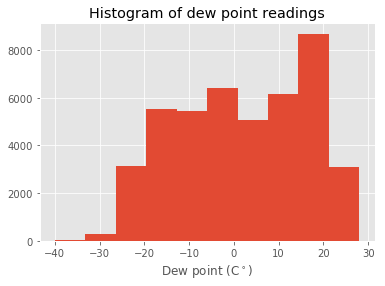

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("Histogram of dew point readings")
ax.set_xlabel("Dew point (C$^\circ$)")
ax.hist(PRSA.DEWP)


## 3.1 Understanding the plotting code

So how was this produced? 

1. We initialized a figure object using `plt.figure`. 
2. Next we created an axis within the figure. We used the command `fig.add_subplot`. We passed an argument `111` to the function which is a short hand for creating only one axes. We will learn about this command in the next unit. 
3. With an ax object created, we now set a title using the `set_title` function and also label the x -axis with its label. 
4. The histogram proper is plotting by calling the `hist` method on the axes instance. We merely need to pass the (1-dimensional) array of data to the function. 

Notice the output that is produced. It's not very nice and probably needs some prettying up. But as a quick exploratory plot, it does its job. Notice the extra textual output. These can be suppressed with the `;` written at the end of the last statement in the code block. 

## 3.2 Customizing our histogram

The chart above can be customized to our liking by passing keyword arguments to the function. 

1. **Number of bins**. The number of bins may be adjusted with the `bins=` keyword argument. However, do note that more bins does not translate into a better chart. With more bins, one tends to pick up much more variation between data (noise) that what is necessary. Therefore, try to choose a value which will give you the best sense of how the data is dristributed between the extremes of no details (small `bins` value) to a noisy chart (high `bins` value). 

2. **Normalization**. Setting `normed=True` (it is `False` by default) means that the total area of the histogram is set to 1. This setting is useful to compare distributions of variables on different orders of magnitude. 

3. **Is a log scale needed?**. `log=` flag may be used if you want the *count* (*or relative counts*) to be plotted on a log scale. This may be useful if the counts in different bins differ by huge orders of magnitude. This is especially true for data modelled by to power law distributions. 

4. **Cumulative sums**. Sometimes, you want to plot the ogive instead. Enable this by setting `cumulative=True`. 

3. **Colors**. Selecting the best color, especially when comparing multiple histograms on the same axis is crucial. You have choose different colors using `color=` argument. You may use any hexadecimal color codes (e.g. `##660000`) or CSS color names, matplotlib color abbrevations (e.g. `c` for `cyan`, `m` for magenta, `b` for blue etc..) 

1. **Lines between bars**. A histogram is more presentable is one draws lines between bars. Enable this by setting `lw=` to an appropraite thickness (any value around 0.5 is ok) and giving it a color by setting `ec=`. 

3. **Transparency control**. This is useful if there are multiple histograms. Use `alpha=` and enter any value from 0 (fully transparent) to 1 (fully opaque). 

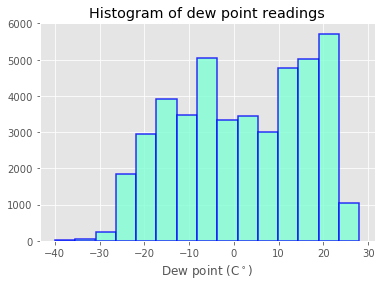

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("Histogram of dew point readings")
ax.set_xlabel("Dew point (C$^\circ$)")
# Remove comments from each option to see its effect or write one of your own. 
ax.hist(PRSA.DEWP,
        bins=15,
#        normed=True,
#        log=False,
#        cumulative=False,
        color="aquamarine",
        lw=1.5,
        ec='b',
        alpha=0.8
       );


More options can be found of the [documentation page][1].

## 3.3 Histograms with weights

The `hist` function is not only used to plot histograms. In essence, it is a function used to plot rectangular patches on an axis. Thus, we use `hist` to plot bar charts. In fact, we may use it to plot stacked bar charts, which is something `seaborn` cannot do. 

In the following dataset, we want to plot the distribution of daily bike rental counts (variable `cnt`) on any given day of the week and seperate them by the variable `weathersit` which is an ordinal variable denoting the severity of the weather. 1 means good weather, 4 means bad.  

[1]:http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html?highlight=hist#matplotlib.axes.Axes.hist

In [7]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*Source*: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

As you can see in the dataset above, we need to plot `weekday` on the x-axis and have `cnt` as the y-axis. How can we plot this using `hist`? The problem is that if we pass the `weekday` array to `hist`, we end up counting the frequency of *each day* in the dataset! 

To solve this, we pass the `cnt` variable as a seperate parameter to `hist` through the keyword argument `weights`. 

In [8]:
group = bike_sharing.groupby("weathersit")
weathers = [w_r for w_r, _ in group]
day_data = [group.get_group(weather).weekday for weather in weathers]
weights_data = [group.get_group(weather).cnt for weather in weathers]

What we need to do is to group the data set by weather rating and create a list of array data to be passed to `hist`. We can do this efficiently using the `groupby` method on data frames and list comprehension statements. Now we have three lists: One for weather rating, one for the day of the week and one more for the daily bike rental counts. 

We pass this to the `hist` function and pass a sequence of floats `[-0.5, 0.5,..., 6.5]` so that each bar is nicely centered on the tick mark. We also plot this count on a log scale (set `log=True`) because we expect quite a large difference between bike rental counts in good weather as compared to bad. Without this, it is very difficult to see any variation for rentals during bad weather. 

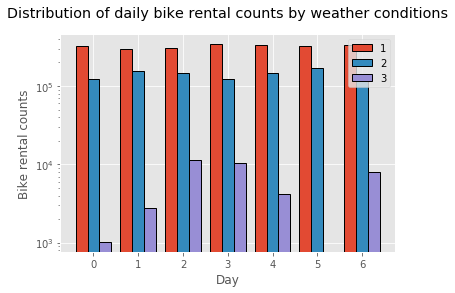

In [9]:
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.set_title("Distribution of daily bike rental counts by weather conditions", y=1.05)
ax2.set_xlabel("Day")
ax2.set_ylabel("Bike rental counts")

# Bars are placed side by side
# ============================
ax2.hist(day_data, 
         label=weathers,
         weights=weights_data,
         bins=np.linspace(-0.5,6.5,8), 
         histtype="bar", # this is the default setting. 
         ec="k", lw=1.0, log=True,
    )


'''
# Bars are stacked on top of each other
# =====================================
ax2.set_ylim(*(0,5e5))
ax2.hist(day_data,
       label=weathers,
       weights=weights_data,
       bins=np.linspace(-0.5, 6.5, 8),
       ec="k", lw=1.,
       histtype="barstacked", 
       rwidth=0.8)

'''
ax2.legend(loc="best");

As expected, bike rentals are low in bad weather. However, notice the variation within a week for the bad weather category. It is quite clear that people do not go biking on a bad weather Sunday since they have a choice not to go out! 

Let's rerun the cell above by replacing the `ax.hist` function with the following code snippet. This helps us create a stacked bar chart. 

    ax2.set_ylim(*(0,5e5))
    ax2.hist(day_data,
           label=weathers,
           weights=weights_data,
           bins=np.linspace(-0.5, 6.5, 8),
           ec="k", lw=1.,
           histtype="barstacked", 
           rwidth=0.8
        )

A note on this new code: The `histtype="barstacked"` stacks the data on top each other. The new parameter `rwidth=` sets the ratio between the bar width and the bin width, which is the way you put spaces between bars. We disable `log` scale so that the natural totals are more clearly seen. Notice the extreme difference between rentals in different weather conditions. 

There is hardly any differences between work days and weekends although we can detect a slight increase through the week. People do love the outdoors!  

## 3.4 Summary of plotting a histogram

To summarize the teaching points above: 

  * Pass either a single array of data to make into a histogram or a list of arrays if you want multiple data on one chart. You do not need to summarize the data. `hist` will do it for you. 
  * Visual properties can be customize with keyword arguments like `color`, `lw`, `ec`, `alpha`, etc...
  * You can control whether to normalize the plot to have unit area by setting `normed`. 
  * Choose an appropriate chart by setting `histtype= ` to either `bar` or `barstacked`. 
  * Pass frequency counts to the `weights=` parameter if you have a summarized bin count already. 
  
# 4. `hist2d` and the `hexbin` plot

We use `hist2d` to visualize the joint distribution of bivariate data. When we expect correlation between two variables, a two dimensional histogram helps us reveal the structure of that relationship and avoids overplotting. 
## 4.1 Plotting and customizing a 2D histogram
Let's return to the PRSA data set. Recall that a scatterplot suffers from **overplotting**. In order to circumvent this and still get useful insight into the data, we use `hist2d`.

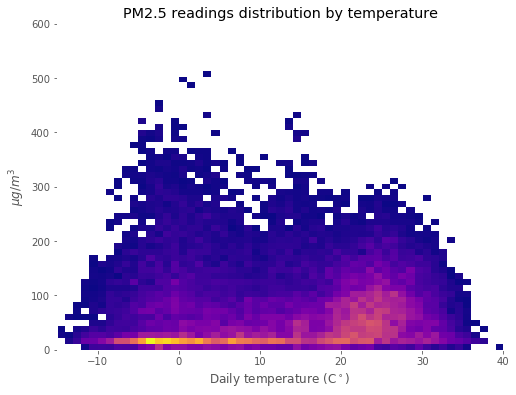

In [10]:
PRSA = PRSA.dropna() #drop missing data
fig3, ax3 = plt.subplots(figsize=(8,6))

ax3.grid(b="off")
ax3.set_facecolor("white")
ax3.set_title("PM2.5 readings distribution by temperature")
ax3.set_ylabel("$\mu g$/$m^3$")
ax3.set_xlabel("Daily temperature (C$^\circ$)")
img=ax3.hist2d(PRSA.TEMP, PRSA["pm2.5"],
           bins=55,
           cmin=5,
           range=[[-15,40],[0,600]],
           cmap="plasma")
#cbar = plt.colorbar(img[3], ax=ax3)
#cbar.set_label("Frequency");

This chart is more informative that a simple scatterplot. For one, we now know that there are two modes in the distribution of temperature and pollutant. Furthermore, there is more variation in pollution levels in the colder seasons as compared to warmer days. 

Let's try to understand how this plot was created. 

    fig3, ax3 = plt.subplots(figsize=(8,6))

We initialize a figure object of width=8 units and height=6 units and an axis object to contain our histogram. 

    ax3.grid(b="off")
    ax3.set_facecolor("white")
    ax3.set_title("PM2.5 readings distribution by temperature")
    ax3.set_ylabel("$\mu g$/$m^3$")
    ax3.set_xlabel("Daily temperature (C$^\circ$)")

These codes set the axis grid to invisible and the background color to white. The rest are plotting information: plot titles and the units used on each axes. 

    ax3.hist2d(PRSA.TEMP, PRSA["pm2.5"],
               bins=55,
               cmin=5,
               range=[[-15,40],[0,600]],
               cmap="plasma");

Finally, this is the command to plot the histogram. Since this is a 2d histogram, we pass two arrays of data, first for the x-axis and then for the y-axis. 

  * The `bins=` parameter is set to 55. That means there are 55 bins in each dimension. Again, too high a number leads to overfitting and creates a very noisy chart. So choose a suitable number so as not to lose too much information. 
  * `cmin=` controls which frequency counts are displayed. If a particular frequency count is below `cmin`, it is not plotted. 
  * The `range` parameter sets the expected range of the data in each dimension. Data points which are outside the range are considered outliers and not tallied. 
  * Finally `cmap` controls the color scheme used to indicate frequency counts. There are many color schemes to choose from and all can be [seen here][1]. `"plasma"` is a type of color scheme known as a *sequential* color scheme. Use this for measures like frequency counts where the contrast between min and max is important. 

## 4.2 Annotating plots with colorbar

This plot is still not perfect. For example, it would be nice to have an way to tell the frequency counts at each color level. To do this, we add a color bar to the plot. 

Modify `ax3.hist(PRSA.TEMP, ...` to the following:

    img = ax3.hist(PRSA.TEMP, ...

This saves the 2d histogram image(along with other supplementary information) in the variable `img`. Let's see what `img` contains.  

[1]:https://matplotlib.org/examples/color/colormaps_reference.html

In [81]:
img

(array([[ nan,  nan,   7., ...,  nan,  nan,  nan],
        [ nan,  10.,   5., ...,  nan,  nan,  nan],
        [ nan,  22.,  15., ...,  nan,  nan,  nan],
        ..., 
        [ nan,  16.,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [  5.,  nan,  nan, ...,  nan,  nan,  nan]]),
 array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
         -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,
          7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
         18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
         29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
         40.]),
 array([   0.        ,   10.90909091,   21.81818182,   32.72727273,
          43.63636364,   54.54545455,   65.45454545,   76.36363636,
          87.27272727,   98.18181818,  109.09090909,  120.        ,
         130.90909091,  141.81818182,  152.72727273,  163.63636364,
         174.5454545

If you observe, `img` is a tuple of length 4. The last entry of the tuple is the image data. Next, after the last line of `ax3.hist` command, add in the function
    
    cbar = plt.colorbar(img[3], ax=ax3)

This means that we are now going to plot a color bar in `ax3` (that's what `ax=ax3` means) using the image data from our 2d histogram (which is why we must pass `img[3]` as an argument to `plt.colorbar`. We save the created colorbar instance in a variable named `cbar` so that we may further customize it. 

To add a title to the colorbar, add in the following line: 

    cbar.set_label("Frequency")

You may see the full plot with code below. 

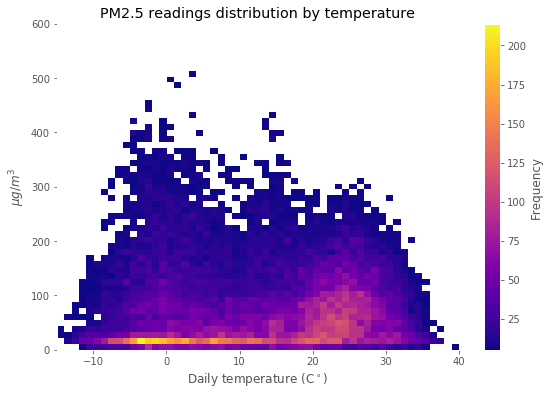

In [12]:
fig3, ax3 = plt.subplots(figsize=(9,6))

ax3.grid(b="off")
ax3.set_facecolor("white")
ax3.set_title("PM2.5 readings distribution by temperature")
ax3.set_ylabel("$\mu g$/$m^3$")
ax3.set_xlabel("Daily temperature (C$^\circ$)")
img=ax3.hist2d(PRSA.TEMP, PRSA["pm2.5"],
           bins=55,
           cmin=5,
           range=[[-15,40],[0,600]],
           cmap="plasma")
cbar = plt.colorbar(img[3], ax=ax3)
cbar.set_label("Frequency");

## 4.3 `hexbin` plots

2D histograms create a square grid and visualize frequency counts using colors. Instead of using a square grid, we may also a hexagonal grid. As hexagons have more sides, this smooths out the resulting image. Let's see this effect with the same PRSA data set as in the `hist2d` plot. 

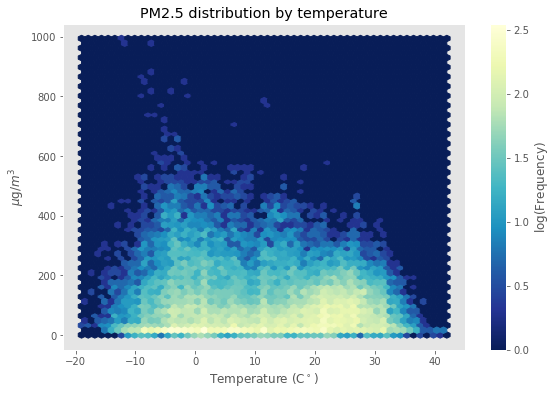

In [73]:
fig4, ax4 = plt.subplots(figsize=(9,6))

ax4.grid(b="off")
ax4.set_title("PM2.5 distribution by temperature")
ax4.set_ylabel("$\mu$g/$m^3$")
ax4.set_xlabel("Temperature (C$^\circ$)")
img = ax4.hexbin(PRSA.TEMP, PRSA["pm2.5"],
           gridsize=55,
           bins="log",
           cmap="YlGnBu_r",
        )
cbar = plt.colorbar(img, ax=ax4)
cbar.set_label("$\log($Frequency)")

However, hexbin plots differ from the square 2d histograms in more ways than the type of tiling used. We may use hexbin plots to investigate how a dependant variable depends on 2 independant variables. Just as we passed bin frequencies to the `weights` parameter in `hist`, we pass the third dependant variable to the `C` parameter in `hexbin`. That means, we can visualize a two dimensional surface embedded in a 3D space as an altitude map. 

### 4.3.1 The `hexbin` `C` parameter
Let's investigate how PM2.5 pollutants vary with temperature and atmospheric pressure in the PRSA dataset. To do that type in (or copy paste) the following code

    fig5, ax5 = plt.subplots(figsize=(8,6))
    ax5.grid(b="off")
    ax5.set_facecolor("white")
    ax5.set_title("PM2.5 pollutants as a function of temperature\nand atmospheric pressure")
    ax5.set_xlabel("Temperature (C$^\circ$)")
    ax5.set_ylabel("Pressure (hPa)")
    img = ax5.hexbin(PRSA.TEMP, PRSA.PRES, C=PRSA["pm2.5"],
        gridsize=(30, 20),
        cmap="rainbow")
    cbar = plt.colorbar(img, ax=ax5)
    cbar.set_label("$\mu$g/m$^3$")
    

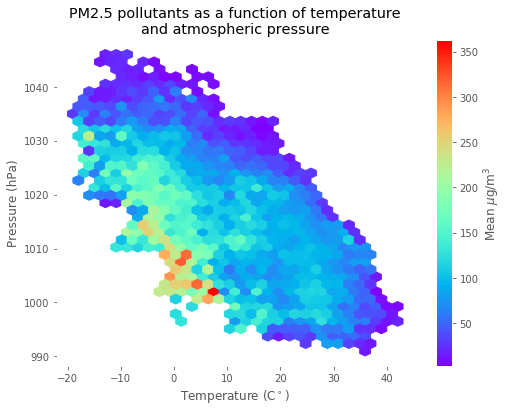

In [182]:
fig5, ax5 = plt.subplots(figsize=(8,6))
ax5.grid(b="off")
ax5.set_facecolor("white")
ax5.set_title("PM2.5 pollutants as a function of temperature\nand atmospheric pressure")
ax5.set_xlabel("Temperature (C$^\circ$)")
ax5.set_ylabel("Pressure (hPa)")
img = ax5.hexbin(PRSA.TEMP, PRSA.PRES, C=PRSA["pm2.5"],
    gridsize=(30,20), # we want 30 hexagons along the x axis and 20 hexagons along the y axis. 
    cmap="rainbow",
    )
cbar = plt.colorbar(img, ax=ax5)
cbar.set_label("Mean $\mu$g/m$^3$")

The color for each hexagon is determined by the mean value of each PM2.5 readings corresponding to the pressure and temperature readings contained in each hexagon. 
### 4.3.2 Changing the aggregation function for each hexbin
However, the aggregation function on each hexagon can be changed by specifying another function to argument `reduce_C_function`. Let's change this by passing the following code to  `hexbin`. 

    reduce_C_function=max

*Exercise: Change the label of the color bar to indicate that we are taking the maximum PM2.5 readings in each hexagon.* 

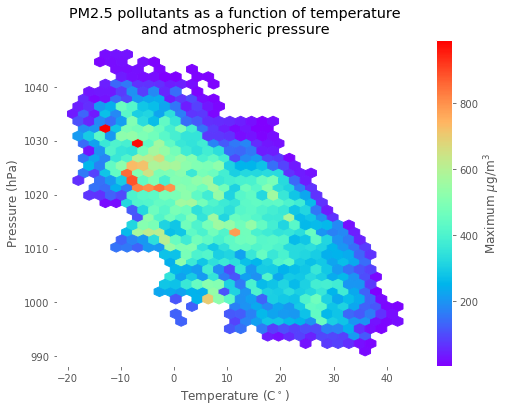

In [181]:
fig5, ax5 = plt.subplots(figsize=(8,6))
ax5.grid(b="off")
ax5.set_facecolor("white")
ax5.set_title("PM2.5 pollutants as a function of temperature\nand atmospheric pressure")
ax5.set_xlabel("Temperature (C$^\circ$)")
ax5.set_ylabel("Pressure (hPa)")
img = ax5.hexbin(PRSA.TEMP, PRSA.PRES, C=PRSA["pm2.5"],
    gridsize=(30,20),
    reduce_C_function=max,
    cmap="rainbow",
)
cbar = plt.colorbar(img, ax=ax5)
# Write your answer below 

cbar.set_label("Maximum $\mu$g/m$^3$") ## Answer: Remove on deployment

### 4.3.3 Changing the `bins` parameter

Besides controlling the number of hexagons, we can also bin the hexagons so that the hexagons within the same bin have the same color. This helps us further smooth out the plot and avoid overfitting. 

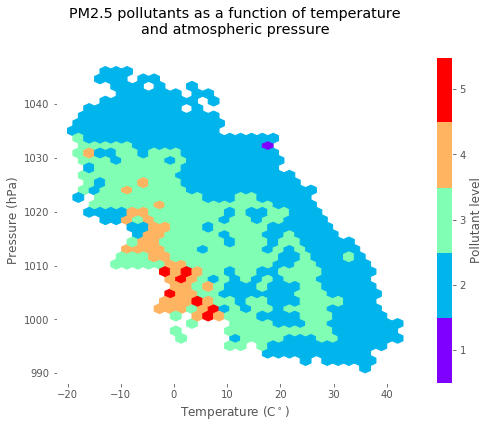

In [290]:
d_rainbow = mpl.cm.get_cmap("rainbow", 5)
ticks=[0.4, 1.2, 2.0, 2.8, 3.6]

fig5, ax5 = plt.subplots(figsize=(8,6))
ax5.grid(b="off")
ax5.set_facecolor("white")
ax5.set_title("PM2.5 pollutants as a function of temperature\nand atmospheric pressure", y=1.05)
ax5.set_xlabel("Temperature (C$^\circ$)")
ax5.set_ylabel("Pressure (hPa)")
img = ax5.hexbin(PRSA.TEMP, PRSA.PRES, C=PRSA["pm2.5"],
    gridsize=(30,20),
    bins=5,
    cmap=d_rainbow             
    ) 
cbar = plt.colorbar(img, ax=ax5, ticks=[0.4, 1.2, 2.0, 2.8, 3.6])
cbar.set_label("Pollutant level")
cbar.set_ticklabels(["%d" % (x) for x in range(1,6)])

By passing `"log"` to the `bins` parameter, we normalize the color scale so that a color corresponds to $\log(x+1)$ where $x$ is the aggregated `C` value of each hexagon. As you can see above, this may help bring out fine details between lumonosity levels. Note that the data has **not** be normalized, only the color correspondence.  

    bins="log"
    
    cbar.set_label("$\log$ Mean $\mu$g/m$^3$")
    
We could also pass a single `int`, $n$, to the parameter so that `hexbin` creates $n$ of such color levels. 
    
    import matplotlib as mpl
    d_rainbow = mpl.cm.get_cmap("rainbow", 5)
    ticks=[0.4, 1.2, 2.0, 2.8, 3.6]
    ...
    
    bins=5
    cmap=d_rainbow
    ...
    cbar = plt.colorbar(img, ax=ax5, ticks=ticks)
    cbar.set_label("Pollutant level")
    cbar.set_ticklabels(["%d" % (x) for x in range(1,6)])

By passing a list of `int`'s, we can set the binning boundaries explicitly. Note that we are setting the lower bound of these bins. 
    
    import matplotlib as mpl
    d_rainbow = mpl.cm.get_cmap("rainbow", 4)
    
    ...
    
    bins=[0, 50, 100, 200],
    cmap=d_rainbow
    
    ...
    
    cbar = plt.colorbar(img, ax=ax5, extend="max", ticks=[1, 1.75, 2.5, 3.25])
    cbar.set_label("$\mu$m/$m^3$")
    cbar.set_ticklabels(["$\geq 0$", "$\geq 50$", "$\geq 100$", "$\geq 200$"])